In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set Kp=1 , Kd=2   **( noise_std_v = 0.01 , noise_std_theta = 0.001 )**


In [2]:
# time vector
t = np.arange(0, 15, 0.01)  # time step
T = 15

t


array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.497e+01, 1.498e+01,
       1.499e+01])

In [3]:
#  matrix A
A = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [1, T, T**2, T**3, 0, 0, 0, 0],
    [0, 1, 2*T, 3*T**2, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, T, T**2, T**3],
    [0, 0, 0, 0, 0, 1, 2*T, 3*T**2]
])

A

array([[   1,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0],
       [   1,   15,  225, 3375,    0,    0,    0,    0],
       [   0,    1,   30,  675,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,   15,  225, 3375],
       [   0,    0,    0,    0,    0,    1,   30,  675]])

In [4]:
# pseudo-inverse of A
Ainv = np.linalg.pinv(A)

Ainv

array([[ 1.00000000e+00,  6.58070820e-13,  0.00000000e+00,
         0.00000000e+00, -8.64325972e-16,  3.91841507e-15,
         0.00000000e+00,  0.00000000e+00],
       [ 4.16333634e-17,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.00180281e-16,  1.21430643e-17,
         0.00000000e+00,  0.00000000e+00],
       [-1.33333333e-02, -1.33333333e-01,  0.00000000e+00,
         0.00000000e+00,  1.33333333e-02, -6.66666667e-02,
         0.00000000e+00,  0.00000000e+00],
       [ 5.92592593e-04,  4.44444444e-03,  0.00000000e+00,
         0.00000000e+00, -5.92592593e-04,  4.44444444e-03,
         0.00000000e+00,  0.00000000e+00],
       [ 4.38264820e-17, -1.56199568e-17,  1.00000000e+00,
         4.13738488e-13, -4.38264820e-17,  2.19459069e-16,
         3.73236598e-16, -9.14524532e-16],
       [-3.59628264e-18, -8.65405541e-17, -1.66533454e-16,
         1.00000000e+00,  3.59628264e-18, -1.80076414e-17,
        -3.85975973e-17,  7.75421394e-16],
       [-1.03997980e-19,  1.185236

In [5]:
# vector b
b = np.array([0, 0, 0, -0.5, 5, 0, 5, -0.5])
b

array([ 0. ,  0. ,  0. , -0.5,  5. ,  0. ,  5. , -0.5])

In [6]:
# Cefficients using matrix multiplication
x = np.matmul(Ainv, b)
x

array([-4.32162986e-15, -5.00901404e-16,  6.66666667e-02, -2.96296296e-03,
       -2.04764931e-13, -5.00000000e-01,  1.66666667e-01, -7.40740741e-03])

In [7]:
# Extracting coefficients
a11, a12, a13, a14, a21, a22, a23, a24 = x
x

array([-4.32162986e-15, -5.00901404e-16,  6.66666667e-02, -2.96296296e-03,
       -2.04764931e-13, -5.00000000e-01,  1.66666667e-01, -7.40740741e-03])

In [8]:
# Calculating X and Y with polynomial equations
X_desired = a11 + a12 * t + a13 * t**2 + a14 * t**3
Y_desired = a21 + a22 * t + a23 * t**2 + a24 * t**3
X_desired
Y_desired

array([-2.04764931e-13, -4.98334074e-03, -9.93339259e-03, ...,
        5.01485020e+00,  5.00993339e+00,  5.00498334e+00])

In [9]:
# Calculating x_double_dot and y_double_dot from the trajectory
x_double_dot = np.gradient(np.gradient(X_desired, t), t)
y_double_dot = np.gradient(np.gradient(Y_desired, t), t)

print("x_double_dot values:")
print(x_double_dot)
print("y_double_dot values:")
print(y_double_dot)

# robot states
x_robot = X_desired[0]
y_robot = Y_desired[0]
theta_robot = np.arctan2(np.gradient(Y_desired, t)[0], np.gradient(X_desired, t)[0])
V_robot = np.sqrt(np.gradient(X_desired, t)[0]**2 + np.gradient(Y_desired, t)[0]**2)

print("Initial robot state values:")
print("x_robot:", x_robot)
print("y_robot:", y_robot)
print("theta_robot:", theta_robot)
print("V_robot:", V_robot)

# store robot states
x_robot_states = [x_robot]
y_robot_states = [y_robot]

noise_std_v = 0.01
noise_std_theta = 0.001

print("Noise standard deviations:")
print("noise_std_v:", noise_std_v)
print("noise_std_theta:", noise_std_theta)


x_double_dot values:
[ 0.06657778  0.09982222  0.13297778 ... -0.1328     -0.09968889
 -0.06648889]
y_double_dot values:
[ 0.16644444  0.24955556  0.33244444 ... -0.332      -0.24922222
 -0.16622222]
Initial robot state values:
x_robot: -4.321629859527221e-15
y_robot: -2.0476493111153668e-13
theta_robot: -1.5694591315119313
V_robot: 0.498334519607811
Noise standard deviations:
noise_std_v: 0.01
noise_std_theta: 0.001


In [10]:
# Set Proportional and derivative gains
kpx = 1
kpy = 1
kdx = 2
kdy = 2

print("Proportional and derivative gains:")
print("kpx:", kpx)
print("kpy:", kpy)
print("kdx:", kdx)
print("kdy:", kdy)


Proportional and derivative gains:
kpx: 1
kpy: 1
kdx: 2
kdy: 2


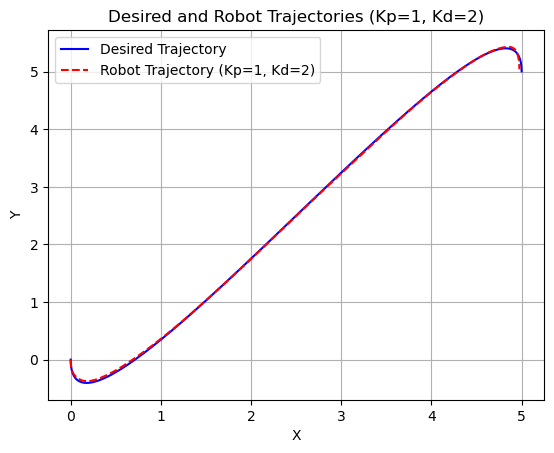

In [11]:
# the unicycle equations using Euler's method
for i in range(1, len(t)):
    # Calculating error terms
    x_error = x_robot - X_desired[i]
    y_error = y_robot - Y_desired[i]
    x_dot_error = V_robot * np.cos(theta_robot) - np.gradient(X_desired, t)[i]
    y_dot_error = V_robot * np.sin(theta_robot) - np.gradient(Y_desired, t)[i]

    # Calculating control inputs using the closed-loop controller with matrix inverse
    A_inv = np.linalg.inv(np.array([
        [np.cos(theta_robot), -V_robot * np.sin(theta_robot)],
        [np.sin(theta_robot), V_robot * np.cos(theta_robot)]
    ]))
    b = np.array([
        x_double_dot[i] - kpx * x_error - kdx * x_dot_error,
        y_double_dot[i] - kpy * y_error - kdy * y_dot_error
    ])
    control_inputs = np.matmul(A_inv, b)

    # Extracting control inputs
    a = control_inputs[0]
    omega = control_inputs[1]

    # Adding noise to V and theta
    V_robot += a * (t[i] - t[i-1]) + np.random.normal(0, noise_std_v)
    theta_robot += omega * (t[i] - t[i-1]) + np.random.normal(0, noise_std_theta)

    # Update robot states
    x_robot += V_robot * np.cos(theta_robot) * (t[i] - t[i-1])
    y_robot += V_robot * np.sin(theta_robot) * (t[i] - t[i-1])

    x_robot_states.append(x_robot)
    y_robot_states.append(y_robot)

# Plot the desired trajectory and robot trajectory for Kp = 1 and Kd = 2
plt.figure()
plt.plot(X_desired, Y_desired, label='Desired Trajectory', color='blue')
plt.plot(x_robot_states, y_robot_states, label='Robot Trajectory (Kp=1, Kd=2)', linestyle='--', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Desired and Robot Trajectories (Kp=1, Kd=2)')
plt.grid(True)
plt.show()

# Set Kp=4 , Kd=4 (**noise_std_v = 0.01 noise_std_theta = 0.001**)



In [30]:
import numpy as np
import matplotlib.pyplot as plt

# time vector
t = np.arange(0, 15, 0.01)  # time step
T = 15

#  matrix A
A = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [1, T, T**2, T**3, 0, 0, 0, 0],
    [0, 1, 2*T, 3*T**2, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, T, T**2, T**3],
    [0, 0, 0, 0, 0, 1, 2*T, 3*T**2]
])


# pseudo-inverse of A
Ainv = np.linalg.pinv(A)

# vector b
b = np.array([0, 0, 0, -0.5, 5, 0, 5, -0.5])

# Cefficients using matrix multiplication
x = np.matmul(Ainv, b)

# Extracting coefficients
a11, a12, a13, a14, a21, a22, a23, a24 = x

# Calculating X and Y with polynomial equations
X_desired = a11 + a12 * t + a13 * t**2 + a14 * t**3
Y_desired = a21 + a22 * t + a23 * t**2 + a24 * t**3
X_desired
Y_desired

# Calculating x_double_dot and y_double_dot from the trajectory
x_double_dot = np.gradient(np.gradient(X_desired, t), t)
y_double_dot = np.gradient(np.gradient(Y_desired, t), t)

print("x_double_dot values:")
print(x_double_dot)
print("y_double_dot values:")
print(y_double_dot)

# robot states
x_robot = X_desired[0]
y_robot = Y_desired[0]
theta_robot = np.arctan2(np.gradient(Y_desired, t)[0], np.gradient(X_desired, t)[0])
V_robot = np.sqrt(np.gradient(X_desired, t)[0]**2 + np.gradient(Y_desired, t)[0]**2)

print("Initial robot state values:")
print("x_robot:", x_robot)
print("y_robot:", y_robot)
print("theta_robot:", theta_robot)
print("V_robot:", V_robot)

# store robot states
x_robot_states = [x_robot]
y_robot_states = [y_robot]

noise_std_v = 0.01
noise_std_theta = 0.001

print("Noise standard deviations:")
print("noise_std_v:", noise_std_v)
print("noise_std_theta:", noise_std_theta)







x_double_dot values:
[ 0.06657778  0.09982222  0.13297778 ... -0.1328     -0.09968889
 -0.06648889]
y_double_dot values:
[ 0.16644444  0.24955556  0.33244444 ... -0.332      -0.24922222
 -0.16622222]
Initial robot state values:
x_robot: -4.321629859527221e-15
y_robot: -2.0476493111153668e-13
theta_robot: -1.5694591315119313
V_robot: 0.498334519607811
Noise standard deviations:
noise_std_v: 0.01
noise_std_theta: 0.001


In [31]:
# Set Proportional and derivative gains
kpx = 4
kpy = 4
kdx = 4
kdy = 4

print("Proportional and derivative gains:")
print("kpx:", kpx)
print("kpy:", kpy)
print("kdx:", kdx)
print("kdy:", kdy)

Proportional and derivative gains:
kpx: 4
kpy: 4
kdx: 4
kdy: 4


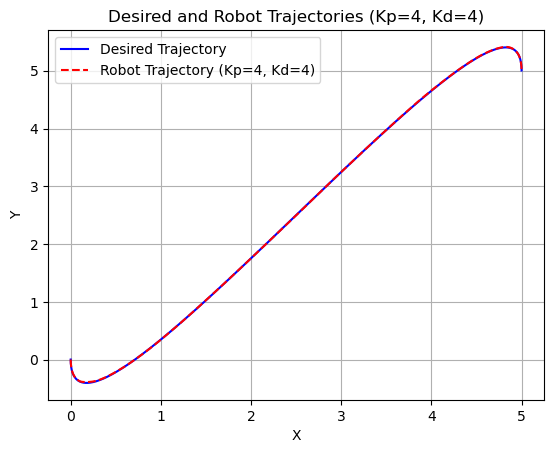

In [32]:
# the unicycle equations using Euler's method
for i in range(1, len(t)):
    # Calculating error terms
    x_error = x_robot - X_desired[i]
    y_error = y_robot - Y_desired[i]
    x_dot_error = V_robot * np.cos(theta_robot) - np.gradient(X_desired, t)[i]
    y_dot_error = V_robot * np.sin(theta_robot) - np.gradient(Y_desired, t)[i]

    # Calculating control inputs using the closed-loop controller with matrix inverse
    A_inv = np.linalg.inv(np.array([
        [np.cos(theta_robot), -V_robot * np.sin(theta_robot)],
        [np.sin(theta_robot), V_robot * np.cos(theta_robot)]
    ]))
    b = np.array([
        x_double_dot[i] - kpx * x_error - kdx * x_dot_error,
        y_double_dot[i] - kpy * y_error - kdy * y_dot_error
    ])
    control_inputs = np.matmul(A_inv, b)

    # Extracting control inputs
    a = control_inputs[0]
    omega = control_inputs[1]

    # Adding noise to V and theta
    V_robot += a * (t[i] - t[i-1]) + np.random.normal(0, noise_std_v)
    theta_robot += omega * (t[i] - t[i-1]) + np.random.normal(0, noise_std_theta)

    # Update robot states
    x_robot += V_robot * np.cos(theta_robot) * (t[i] - t[i-1])
    y_robot += V_robot * np.sin(theta_robot) * (t[i] - t[i-1])

    x_robot_states.append(x_robot)
    y_robot_states.append(y_robot)

# Plot the desired trajectory and robot trajectory for Kp = 4 and Kd = 4
plt.figure()
plt.plot(X_desired, Y_desired, label='Desired Trajectory', color='blue')
plt.plot(x_robot_states, y_robot_states, label='Robot Trajectory (Kp=4, Kd=4)', linestyle='--', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Desired and Robot Trajectories (Kp=4, Kd=4)')
plt.grid(True)
plt.show()

# Set Kp=4 , Kd=4 (**noise_std_v = 0.01; noise_std_theta = 0.1**)



x_double_dot values:
[ 0.06657778  0.09982222  0.13297778 ... -0.1328     -0.09968889
 -0.06648889]
y_double_dot values:
[ 0.16644444  0.24955556  0.33244444 ... -0.332      -0.24922222
 -0.16622222]
Initial robot state values:
x_robot: -4.321629859527221e-15
y_robot: -2.0476493111153668e-13
theta_robot: -1.5694591315119313
V_robot: 0.498334519607811
Noise standard deviations:
noise_std_v: 0.01
noise_std_theta: 0.1
Proportional and derivative gains:
kpx: 4
kpy: 4
kdx: 4
kdy: 4


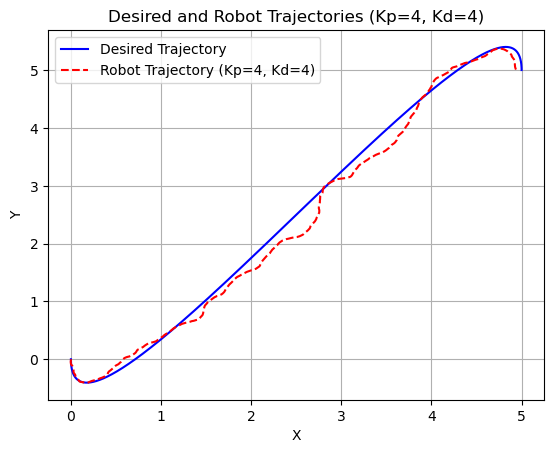

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# time vector
t = np.arange(0, 15, 0.01)  # time step
T = 15

#  matrix A
A = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [1, T, T**2, T**3, 0, 0, 0, 0],
    [0, 1, 2*T, 3*T**2, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, T, T**2, T**3],
    [0, 0, 0, 0, 0, 1, 2*T, 3*T**2]
])


# pseudo-inverse of A
Ainv = np.linalg.pinv(A)

# vector b
b = np.array([0, 0, 0, -0.5, 5, 0, 5, -0.5])

# Cefficients using matrix multiplication
x = np.matmul(Ainv, b)

# Extracting coefficients
a11, a12, a13, a14, a21, a22, a23, a24 = x

# Calculating X and Y with polynomial equations
X_desired = a11 + a12 * t + a13 * t**2 + a14 * t**3
Y_desired = a21 + a22 * t + a23 * t**2 + a24 * t**3
X_desired
Y_desired

# Calculating x_double_dot and y_double_dot from the trajectory
x_double_dot = np.gradient(np.gradient(X_desired, t), t)
y_double_dot = np.gradient(np.gradient(Y_desired, t), t)

print("x_double_dot values:")
print(x_double_dot)
print("y_double_dot values:")
print(y_double_dot)

# robot states
x_robot = X_desired[0]
y_robot = Y_desired[0]
theta_robot = np.arctan2(np.gradient(Y_desired, t)[0], np.gradient(X_desired, t)[0])
V_robot = np.sqrt(np.gradient(X_desired, t)[0]**2 + np.gradient(Y_desired, t)[0]**2)

print("Initial robot state values:")
print("x_robot:", x_robot)
print("y_robot:", y_robot)
print("theta_robot:", theta_robot)
print("V_robot:", V_robot)

# store robot states
x_robot_states = [x_robot]
y_robot_states = [y_robot]

noise_std_v = 0.01
noise_std_theta = 0.1

print("Noise standard deviations:")
print("noise_std_v:", noise_std_v)
print("noise_std_theta:", noise_std_theta)


# Set Proportional and derivative gains
kpx = 4
kpy = 4
kdx = 4
kdy = 4

print("Proportional and derivative gains:")
print("kpx:", kpx)
print("kpy:", kpy)
print("kdx:", kdx)
print("kdy:", kdy)

# the unicycle equations using Euler's method
for i in range(1, len(t)):
    # Calculating error terms
    x_error = x_robot - X_desired[i]
    y_error = y_robot - Y_desired[i]
    x_dot_error = V_robot * np.cos(theta_robot) - np.gradient(X_desired, t)[i]
    y_dot_error = V_robot * np.sin(theta_robot) - np.gradient(Y_desired, t)[i]

    # Calculating control inputs using the closed-loop controller with matrix inverse
    A_inv = np.linalg.inv(np.array([
        [np.cos(theta_robot), -V_robot * np.sin(theta_robot)],
        [np.sin(theta_robot), V_robot * np.cos(theta_robot)]
    ]))
    b = np.array([
        x_double_dot[i] - (kpx * x_error) - (kdx * x_dot_error),
        y_double_dot[i] - (kpy * y_error) - (kdy * y_dot_error)
    ])
    control_inputs = np.matmul(A_inv, b)

    # Extracting control inputs
    a = control_inputs[0]
    omega = control_inputs[1]

    # Adding noise to V and theta
    V_robot += a * (t[i] - t[i-1]) + np.random.normal(0, noise_std_v)
    theta_robot += omega * (t[i] - t[i-1]) + np.random.normal(0, noise_std_theta)

    # Update robot states
    x_robot += V_robot * np.cos(theta_robot) * (t[i] - t[i-1])
    y_robot += V_robot * np.sin(theta_robot) * (t[i] - t[i-1])

    x_robot_states.append(x_robot)
    y_robot_states.append(y_robot)

# Plot the desired trajectory and robot trajectory for Kp = 4 and Kd = 4
plt.figure()
plt.plot(X_desired, Y_desired, label='Desired Trajectory', color='blue')
plt.plot(x_robot_states, y_robot_states, label='Robot Trajectory (Kp=4, Kd=4)', linestyle='--', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Desired and Robot Trajectories (Kp=4, Kd=4)')
plt.grid(True)
plt.show()


# Set Kp=4 , Kd=4 (**noise_std_v = 0.01; noise_std_theta = 0.01**)

x_double_dot values:
[ 0.06657778  0.09982222  0.13297778 ... -0.1328     -0.09968889
 -0.06648889]
y_double_dot values:
[ 0.16644444  0.24955556  0.33244444 ... -0.332      -0.24922222
 -0.16622222]
Initial robot state values:
x_robot: -4.321629859527221e-15
y_robot: -2.0476493111153668e-13
theta_robot: -1.5694591315119313
V_robot: 0.498334519607811
Noise standard deviations:
noise_std_v: 0.01
noise_std_theta: 0.01
Proportional and derivative gains:
kpx: 4
kpy: 4
kdx: 4
kdy: 4


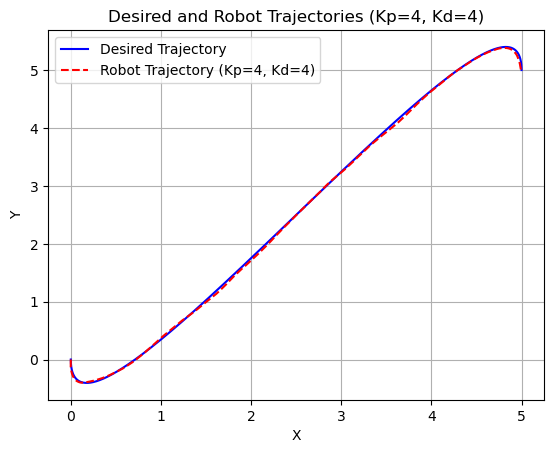

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# time vector
t = np.arange(0, 15, 0.01)  # time step
T = 15

#  matrix A
A = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [1, T, T**2, T**3, 0, 0, 0, 0],
    [0, 1, 2*T, 3*T**2, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, T, T**2, T**3],
    [0, 0, 0, 0, 0, 1, 2*T, 3*T**2]
])


# pseudo-inverse of A
Ainv = np.linalg.pinv(A)

# vector b
b = np.array([0, 0, 0, -0.5, 5, 0, 5, -0.5])

# Cefficients using matrix multiplication
x = np.matmul(Ainv, b)

# Extracting coefficients
a11, a12, a13, a14, a21, a22, a23, a24 = x

# Calculating X and Y with polynomial equations
X_desired = a11 + a12 * t + a13 * t**2 + a14 * t**3
Y_desired = a21 + a22 * t + a23 * t**2 + a24 * t**3
X_desired
Y_desired

# Calculating x_double_dot and y_double_dot from the trajectory
x_double_dot = np.gradient(np.gradient(X_desired, t), t)
y_double_dot = np.gradient(np.gradient(Y_desired, t), t)

print("x_double_dot values:")
print(x_double_dot)
print("y_double_dot values:")
print(y_double_dot)

# robot states
x_robot = X_desired[0]
y_robot = Y_desired[0]
theta_robot = np.arctan2(np.gradient(Y_desired, t)[0], np.gradient(X_desired, t)[0])
V_robot = np.sqrt(np.gradient(X_desired, t)[0]**2 + np.gradient(Y_desired, t)[0]**2)

print("Initial robot state values:")
print("x_robot:", x_robot)
print("y_robot:", y_robot)
print("theta_robot:", theta_robot)
print("V_robot:", V_robot)

# store robot states
x_robot_states = [x_robot]
y_robot_states = [y_robot]

noise_std_v = 0.01
noise_std_theta = 0.01

print("Noise standard deviations:")
print("noise_std_v:", noise_std_v)
print("noise_std_theta:", noise_std_theta)


# Set Proportional and derivative gains
kpx = 4
kpy = 4
kdx = 4
kdy = 4

print("Proportional and derivative gains:")
print("kpx:", kpx)
print("kpy:", kpy)
print("kdx:", kdx)
print("kdy:", kdy)

# the unicycle equations using Euler's method
for i in range(1, len(t)):
    # Calculating error terms
    x_error = x_robot - X_desired[i]
    y_error = y_robot - Y_desired[i]
    x_dot_error = V_robot * np.cos(theta_robot) - np.gradient(X_desired, t)[i]
    y_dot_error = V_robot * np.sin(theta_robot) - np.gradient(Y_desired, t)[i]

    # Calculating control inputs using the closed-loop controller with matrix inverse
    A_inv = np.linalg.inv(np.array([
        [np.cos(theta_robot), -V_robot * np.sin(theta_robot)],
        [np.sin(theta_robot), V_robot * np.cos(theta_robot)]
    ]))
    b = np.array([
        x_double_dot[i] - (kpx * x_error) - (kdx * x_dot_error),
        y_double_dot[i] - (kpy * y_error )- (kdy * y_dot_error)
    ])
    control_inputs = np.matmul(A_inv, b)

    # Extracting control inputs
    a = control_inputs[0]
    omega = control_inputs[1]

    # Adding noise to V and theta
    V_robot += a * (t[i] - t[i-1]) + np.random.normal(0, noise_std_v)
    theta_robot += omega * (t[i] - t[i-1]) + np.random.normal(0, noise_std_theta)

    # Update robot states
    x_robot += V_robot * np.cos(theta_robot) * (t[i] - t[i-1])
    y_robot += V_robot * np.sin(theta_robot) * (t[i] - t[i-1])

    x_robot_states.append(x_robot)
    y_robot_states.append(y_robot)

# Plot the desired trajectory and robot trajectory for Kp = 4 and Kd = 4
plt.figure()
plt.plot(X_desired, Y_desired, label='Desired Trajectory', color='blue')
plt.plot(x_robot_states, y_robot_states, label='Robot Trajectory (Kp=4, Kd=4)', linestyle='--', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Desired and Robot Trajectories (Kp=4, Kd=4)')
plt.grid(True)
plt.show()